In [1]:
# installing libraries
!pip uninstall umap --yes
!pip install umap-learn

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
# import umap
import umap.umap_ as umap
from collections import defaultdict

from scipy import linalg, spatial
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, SparsePCA, TruncatedSVD
from sklearn.feature_extraction.text import (CountVectorizer, TfidfTransformer, TfidfVectorizer)

from sklearn.utils.extmath import randomized_svd

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [3]:
filename =  '/Users/angky/Cornell/AML/AMLProjectTemp/AML-Project/clustered_books.csv'
df = pd.read_csv(filename)
print(df.head(10))

                     title                                        description  \
0  The Old Man and the Sea  Librarian's note: An alternate cover edition c...   
1       The Vampire Lestat  Lestat. The vampire hero of Anne Rice's enthra...   
2     The Poisonwood Bible  The Poisonwood Bible is a story told by the wi...   
3        Different Seasons  Includes the stories “The Body” and “Rita Hayw...   
4            Invisible Man  First published in 1952 and immediately hailed...   
5            Battle Royale  Koushun Takami's notorious high-octane thrille...   
6    I'll Give You the Sun  At first, Jude and her twin brother Noah, are ...   
7    Because of Winn-Dixie  The summer Opal and her father, the preacher, ...   
8            Lover Avenged  Rehvenge has always kept his distance from the...   
9                Ficciones  The seventeen pieces in Ficciones demonstrate ...   

                               processed_description  cluster  
0  librarian note alternate cover edition fo

In [6]:
df['processed_description'] = df['processed_description'].fillna('')

In [7]:
from sklearn.model_selection import train_test_split
training, development = train_test_split(df, test_size=0.3, random_state=42)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary=True, min_df=2)
training_text = training['processed_description']
development_text = development['processed_description']

X_train_bow = vectorizer.fit_transform(training_text)
X_development_bow = vectorizer.transform(development_text)

print('Number of unigram', len(vectorizer.get_feature_names_out()))

Number of unigram 21605


In [9]:
# Sum the counts of each bigram across all documents
unigram_counts = X_train_bow.sum(axis=0)
unigram_counts = np.array(unigram_counts).flatten()


# Get sorted indices based on counts (in descending order)
sorted_indices = unigram_counts.argsort()[::-1]

# Retrieve the top 10 unigram and their counts using the indices
top_10_unigram = [(vectorizer.get_feature_names_out()[i], unigram_counts[i]) for i in sorted_indices[:10]]

print("Top 10 unigram:")
for unigram, count in top_10_unigram:
    print(f"'{unigram}': {count}")

Top 10 unigram:
'one': 3046
'life': 3032
'world': 2321
'new': 2214
'year': 1965
'time': 1958
'love': 1803
'story': 1747
'find': 1604
'first': 1447


In [10]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
clf = LinearSVC(max_iter=1000)
clf.fit(X_train_bow, training['cluster'])
training_target_pred = clf.predict(X_train_bow)
print(classification_report(training['cluster'], training_target_pred))
print(accuracy_score(training['cluster'], training_target_pred))

/Users/angky/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1304
           1       1.00      1.00      1.00       536
           2       1.00      1.00      1.00      1016
           3       1.00      1.00      1.00       963
           4       1.00      1.00      1.00       167
           5       1.00      1.00      1.00       489
           6       1.00      1.00      1.00        69
           7       1.00      1.00      1.00        52
           8       0.99      1.00      0.99       196
           9       1.00      1.00      1.00      2089
          10       1.00      0.99      0.99        98

    accuracy                           1.00      6979
   macro avg       1.00      1.00      1.00      6979
weighted avg       1.00      1.00      1.00      6979

0.9997134259922625


/Users/angky/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [11]:
development_target_pred = clf.predict(X_development_bow)
print(classification_report(development['cluster'], development_target_pred))


              precision    recall  f1-score   support

           0       0.39      0.43      0.40       536
           1       0.33      0.25      0.29       240
           2       0.28      0.26      0.27       423
           3       0.38      0.35      0.37       416
           4       0.36      0.22      0.27        81
           5       0.30      0.21      0.25       227
           6       0.93      0.90      0.91        29
           7       1.00      0.95      0.97        19
           8       0.59      0.90      0.71        90
           9       0.37      0.43      0.39       865
          10       0.22      0.14      0.17        66

    accuracy                           0.37      2992
   macro avg       0.47      0.46      0.46      2992
weighted avg       0.36      0.37      0.36      2992



/Users/angky/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/angky/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/angky/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/angky/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/angky/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to 

/Users/angky/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/angky/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/angky/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/angky/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/angky/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number o

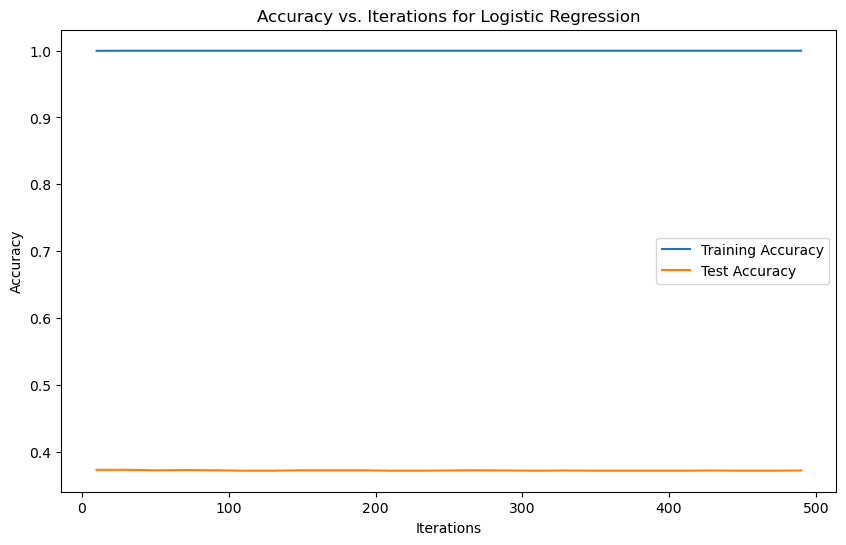

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Function to train and evaluate the model
def train_eval_logistic_regression(X_train, y_train, X_test, y_test, max_iter):
    model = LinearSVC(max_iter=max_iter)
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    return train_accuracy, test_accuracy

# Define the range of iterations (epochs)
iterations = range(10, 500, 20)

# Store the accuracies
train_accuracies = []
test_accuracies = []

for i in iterations:
    train_acc, test_acc = train_eval_logistic_regression(X_train_bow, training['cluster'], X_development_bow, development['cluster'], i)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(iterations, train_accuracies, label='Training Accuracy')
plt.plot(iterations, test_accuracies, label='Test Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Iterations for Logistic Regression')
plt.legend()
plt.show()

/Users/angky/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/angky/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/angky/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/angky/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/angky/anaconda3/l

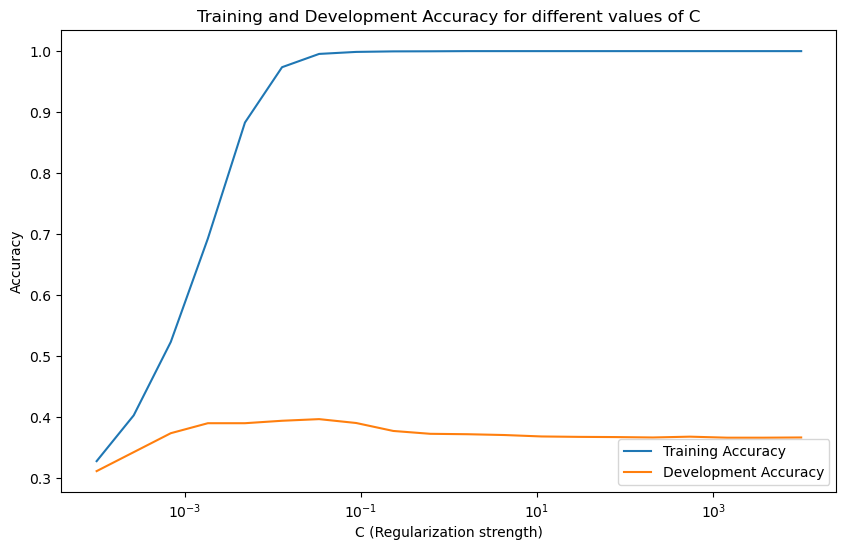

Maximum Training Accuracy: 1.0, achieved at C = 1.623776739188721
Maximum Development Accuracy: 0.3967245989304813, achieved at C = 0.03359818286283781


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Define a range of C values
C_values = np.logspace(-4, 4, 20)

# Lists to store accuracies
train_accuracies = []
development_accuracies = []

# Loop over the values of C
for C_val in C_values:
    clf = LinearSVC(max_iter=200, C=C_val)
    clf.fit(X_train_bow, training['cluster'])

    # Predict and calculate accuracy for training set
    training_pred = clf.predict(X_train_bow)
    train_accuracy = accuracy_score(training['cluster'], training_pred)
    train_accuracies.append(train_accuracy)

    # Predict and calculate accuracy for development set
    development_pred = clf.predict(X_development_bow)
    development_accuracy = accuracy_score(development['cluster'], development_pred)
    development_accuracies.append(development_accuracy)

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, train_accuracies, label='Training Accuracy')
plt.semilogx(C_values, development_accuracies, label='Development Accuracy')
plt.title('Training and Development Accuracy for different values of C')
plt.xlabel('C (Regularization strength)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Find max accuracies
max_train_accuracy = max(train_accuracies)
max_development_accuracy = max(development_accuracies)

# Find the C values corresponding to max accuracies
max_train_C = C_values[train_accuracies.index(max_train_accuracy)]
max_develop_C = C_values[development_accuracies.index(max_development_accuracy)]

# Print the results
print(f'Maximum Training Accuracy: {max_train_accuracy}, achieved at C = {max_train_C}')
print(f'Maximum Development Accuracy: {max_development_accuracy}, achieved at C = {max_develop_C}')

/Users/angky/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/angky/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/angky/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/angky/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/angky/anaconda3/l

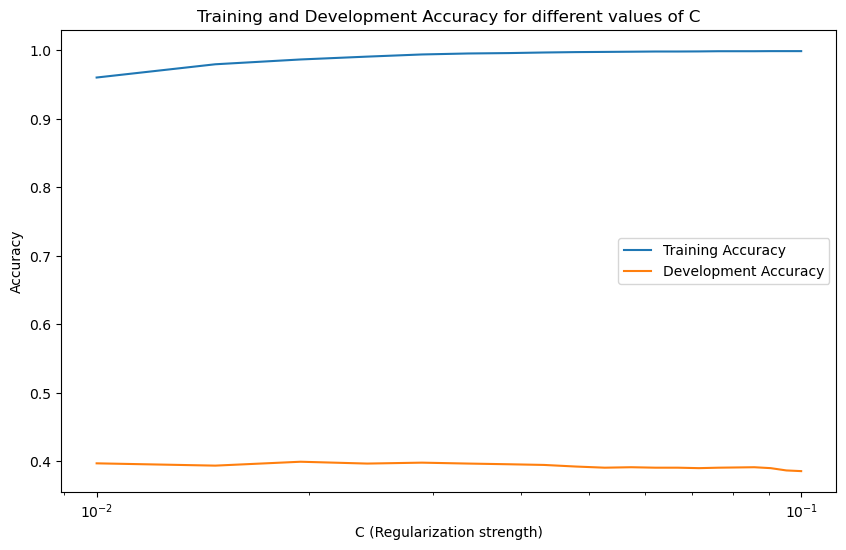

Maximum Training Accuracy: 0.99885370396905, achieved at C = 0.09052631578947369
Maximum Development Accuracy: 0.39939839572192515, achieved at C = 0.019473684210526317


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Define a range of C values
C_values = np.linspace(0.01, 0.1, 20)

# Lists to store accuracies
train_accuracies = []
development_accuracies = []

# Loop over the values of C
for C_val in C_values:
    clf = LinearSVC(max_iter=200, C=C_val)
    clf.fit(X_train_bow, training['cluster'])

    # Predict and calculate accuracy for training set
    training_pred = clf.predict(X_train_bow)
    train_accuracy = accuracy_score(training['cluster'], training_pred)
    train_accuracies.append(train_accuracy)

    # Predict and calculate accuracy for development set
    development_pred = clf.predict(X_development_bow)
    development_accuracy = accuracy_score(development['cluster'], development_pred)
    development_accuracies.append(development_accuracy)

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, train_accuracies, label='Training Accuracy')
plt.semilogx(C_values, development_accuracies, label='Development Accuracy')
plt.title('Training and Development Accuracy for different values of C')
plt.xlabel('C (Regularization strength)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Find max accuracies
max_train_accuracy = max(train_accuracies)
max_development_accuracy = max(development_accuracies)

# Find the C values corresponding to max accuracies
max_train_C = C_values[train_accuracies.index(max_train_accuracy)]
max_develop_C = C_values[development_accuracies.index(max_development_accuracy)]

# Print the results
print(f'Maximum Training Accuracy: {max_train_accuracy}, achieved at C = {max_train_C}')
print(f'Maximum Development Accuracy: {max_development_accuracy}, achieved at C = {max_develop_C}')

Second Iteration (With more feature)

In [16]:
from sklearn.model_selection import train_test_split
training, development = train_test_split(df, test_size=0.3, random_state=42)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary=True, min_df=5, ngram_range=(1, 3))
training_text = training['processed_description']
development_text = development['processed_description']

X_train_bow = vectorizer.fit_transform(training_text)
X_development_bow = vectorizer.transform(development_text)

print('Number of xgram', len(vectorizer.get_feature_names_out()))

Number of xgram 19471


In [18]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
clf = LinearSVC(max_iter=1000)
clf.fit(X_train_bow, training['cluster'])
training_target_pred = clf.predict(X_train_bow)
print(classification_report(training['cluster'], training_target_pred))
print(accuracy_score(training['cluster'], training_target_pred))

/Users/angky/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1304
           1       1.00      1.00      1.00       536
           2       1.00      1.00      1.00      1016
           3       1.00      1.00      1.00       963
           4       1.00      1.00      1.00       167
           5       1.00      1.00      1.00       489
           6       1.00      1.00      1.00        69
           7       1.00      1.00      1.00        52
           8       0.99      1.00      0.99       196
           9       1.00      1.00      1.00      2089
          10       1.00      0.99      0.99        98

    accuracy                           1.00      6979
   macro avg       1.00      1.00      1.00      6979
weighted avg       1.00      1.00      1.00      6979

0.9997134259922625


/Users/angky/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [19]:
development_target_pred = clf.predict(X_development_bow)
print(classification_report(development['cluster'], development_target_pred))


              precision    recall  f1-score   support

           0       0.39      0.42      0.41       536
           1       0.32      0.23      0.27       240
           2       0.26      0.25      0.26       423
           3       0.37      0.35      0.36       416
           4       0.37      0.19      0.25        81
           5       0.29      0.20      0.24       227
           6       0.87      0.90      0.88        29
           7       0.95      0.95      0.95        19
           8       0.58      0.89      0.70        90
           9       0.36      0.43      0.39       865
          10       0.21      0.12      0.15        66

    accuracy                           0.37      2992
   macro avg       0.45      0.45      0.44      2992
weighted avg       0.36      0.37      0.36      2992



/Users/angky/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/angky/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/angky/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/angky/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/angky/anaconda3/l

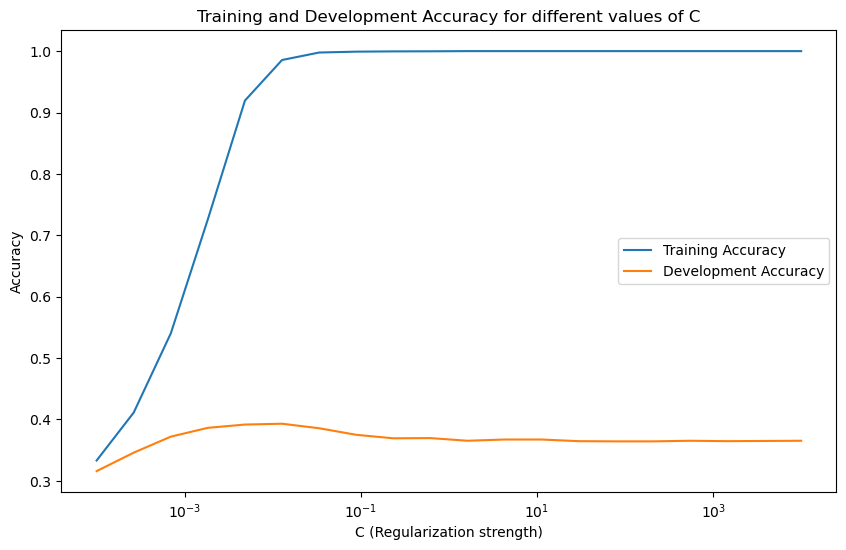

Maximum Training Accuracy: 1.0, achieved at C = 1.623776739188721
Maximum Development Accuracy: 0.393048128342246, achieved at C = 0.012742749857031334


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Define a range of C values
C_values = np.logspace(-4, 4, 20)

# Lists to store accuracies
train_accuracies = []
development_accuracies = []

# Loop over the values of C
for C_val in C_values:
    clf = LinearSVC(max_iter=200, C=C_val)
    clf.fit(X_train_bow, training['cluster'])

    # Predict and calculate accuracy for training set
    training_pred = clf.predict(X_train_bow)
    train_accuracy = accuracy_score(training['cluster'], training_pred)
    train_accuracies.append(train_accuracy)

    # Predict and calculate accuracy for development set
    development_pred = clf.predict(X_development_bow)
    development_accuracy = accuracy_score(development['cluster'], development_pred)
    development_accuracies.append(development_accuracy)

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, train_accuracies, label='Training Accuracy')
plt.semilogx(C_values, development_accuracies, label='Development Accuracy')
plt.title('Training and Development Accuracy for different values of C')
plt.xlabel('C (Regularization strength)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Find max accuracies
max_train_accuracy = max(train_accuracies)
max_development_accuracy = max(development_accuracies)

# Find the C values corresponding to max accuracies
max_train_C = C_values[train_accuracies.index(max_train_accuracy)]
max_develop_C = C_values[development_accuracies.index(max_development_accuracy)]

# Print the results
print(f'Maximum Training Accuracy: {max_train_accuracy}, achieved at C = {max_train_C}')
print(f'Maximum Development Accuracy: {max_development_accuracy}, achieved at C = {max_develop_C}')

/Users/angky/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/angky/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/angky/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/angky/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/angky/anaconda3/l

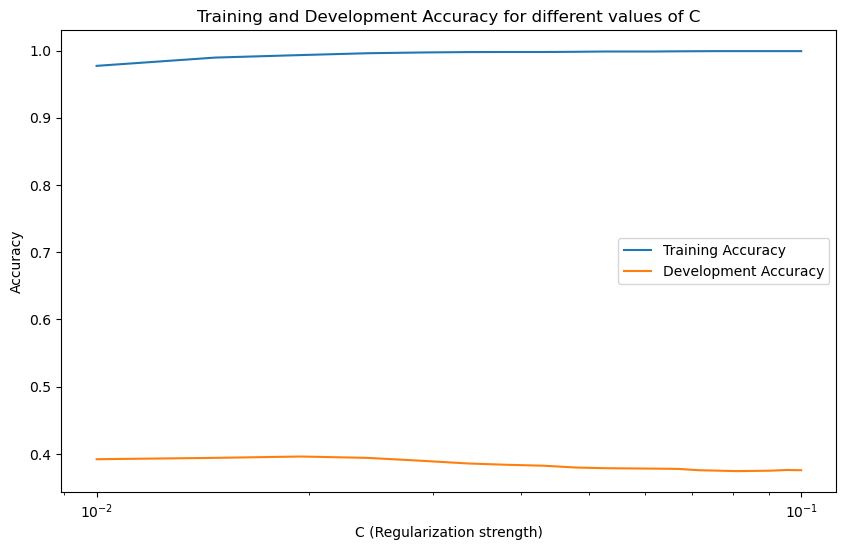

Maximum Training Accuracy: 0.9991402779767875, achieved at C = 0.07631578947368421
Maximum Development Accuracy: 0.3960561497326203, achieved at C = 0.019473684210526317


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Define a range of C values
C_values = np.linspace(0.01, 0.1, 20)

# Lists to store accuracies
train_accuracies = []
development_accuracies = []

# Loop over the values of C
for C_val in C_values:
    clf = LinearSVC(max_iter=200, C=C_val)
    clf.fit(X_train_bow, training['cluster'])

    # Predict and calculate accuracy for training set
    training_pred = clf.predict(X_train_bow)
    train_accuracy = accuracy_score(training['cluster'], training_pred)
    train_accuracies.append(train_accuracy)

    # Predict and calculate accuracy for development set
    development_pred = clf.predict(X_development_bow)
    development_accuracy = accuracy_score(development['cluster'], development_pred)
    development_accuracies.append(development_accuracy)

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, train_accuracies, label='Training Accuracy')
plt.semilogx(C_values, development_accuracies, label='Development Accuracy')
plt.title('Training and Development Accuracy for different values of C')
plt.xlabel('C (Regularization strength)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Find max accuracies
max_train_accuracy = max(train_accuracies)
max_development_accuracy = max(development_accuracies)

# Find the C values corresponding to max accuracies
max_train_C = C_values[train_accuracies.index(max_train_accuracy)]
max_develop_C = C_values[development_accuracies.index(max_development_accuracy)]

# Print the results
print(f'Maximum Training Accuracy: {max_train_accuracy}, achieved at C = {max_train_C}')
print(f'Maximum Development Accuracy: {max_development_accuracy}, achieved at C = {max_develop_C}')